In [3]:
# from pyGSI.diags import Conventional
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from base_plots import base_plots

In [4]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

One big question with this is to use PyGSI or just to borrow some of the code and have with package not rely on PyGSI at all?

## Read diag files

In [5]:
diag_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
diag_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

diag_ges = Conventional(diag_ges_fp)
diag_anl = Conventional(diag_anl_fp)

## Query data

In [6]:
df_ges = diag_ges.get_data()
df_anl = diag_anl.get_data()

In [7]:
for col in df_anl.columns:
    # Check if all elements in the column are equal between df1 and df2
    column_equal = (df_anl[col] == df_ges[col]).all()
    
    if not column_equal:
        print(f"Column '{col}' is different.")

Column 'pressure' is different.
Column 'analysis_use_flag' is different.
Column 'errinv_final' is different.
Column 'observation' is different.
Column 'omf_adjusted' is different.
Column 'omf_unadjusted' is different.
Column 'hofx_unadjusted' is different.
Column 'hofx_adjusted' is different.


## Testing PyGSI filter_obs function

### Set filter arguments

In [8]:
hem = "CONUS"
obs_types = [120]
use = 1
elv_range = (0,20)

In [9]:
df_anl_fil = filter_df(df_anl, use=use, hem=hem, elv_range=elv_range)
df_ges_fil = filter_df(df_ges, use=use, hem=hem, elv_range=elv_range)

## Testing base plots

In [10]:
df_anl_fil

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,prep_qc_mark,setup_qc_mark,prep_use_flag,analysis_use_flag,nonlinear_qc_rel_wgt,errinv_input,errinv_adjust,errinv_final,observation,omf_adjusted,omf_unadjusted,data_pof,data_vertical_velocity,dominant_sfc_type,model_terrain,hofx_unadjusted,hofx_adjusted
15,VRRP8,t,180,0,28.600000,178.100006,0.000000,1017.000000,0.0,0.00000,2.0,1.0,0.0,1.0,4.0,2.0,2.0,1.962277,291.149994,-0.112608,0.373121,-9.990000e+09,-9.990000e+09,0.0,0.000000,290.776886,291.262604
52,47420,t,181,0,43.316662,145.583328,12.979353,998.706177,25.0,0.00000,2.0,1.0,0.0,1.0,4.0,2.0,4.0,4.000000,269.570221,-0.073602,0.064152,-9.990000e+09,-9.990000e+09,4.0,12.979353,269.506073,269.643829
174,47404,t,181,0,44.369999,141.690002,9.957693,999.391052,13.0,0.00000,2.0,1.0,0.0,1.0,4.0,2.0,4.0,4.000000,270.680420,0.255206,0.284375,-9.990000e+09,-9.990000e+09,0.0,9.957693,270.396057,270.425201
175,47424,t,181,0,42.619999,141.550003,0.000000,1003.105103,11.0,0.00000,2.0,1.0,0.0,1.0,4.0,2.0,4.0,4.000000,272.059998,-0.009384,0.279024,-9.990000e+09,-9.990000e+09,0.0,0.000000,271.780975,272.069366
176,47433,t,181,0,42.900002,140.750000,0.000000,1002.691406,179.0,0.00000,2.0,1.0,0.0,1.0,4.0,2.0,4.0,4.000000,273.239990,0.145249,0.459419,-9.990000e+09,-9.990000e+09,0.0,0.000000,272.780579,273.094727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95282,E9339,t,188,0,43.367828,351.590820,15.000000,1014.900024,15.0,-0.25000,2.0,1.0,0.0,1.0,4.0,2.0,2.0,1.254116,285.350006,-1.798890,-1.528046,-9.990000e+09,-9.990000e+09,0.0,0.000000,286.878052,287.148895
95285,C3583,t,188,0,43.470501,356.220490,14.000000,1017.200012,14.0,-0.20000,2.0,1.0,0.0,1.0,4.0,2.0,2.0,1.721022,288.750000,-1.221298,-1.166003,-9.990000e+09,-9.990000e+09,0.0,0.000000,289.916016,289.971283
95286,C3583,t,188,0,43.470501,356.220490,14.000000,1017.000000,14.0,-0.03333,2.0,1.0,0.0,1.0,4.0,2.0,2.0,1.676722,288.750000,-1.221298,-1.127882,-9.990000e+09,-9.990000e+09,0.0,0.000000,289.877869,289.971283
95288,AS353,t,188,0,43.537998,354.376160,17.000000,1015.299988,17.0,-0.25000,2.0,1.0,0.0,1.0,4.0,2.0,2.0,1.375242,288.750000,-1.149903,-0.128800,-9.990000e+09,-9.990000e+09,0.0,0.000000,288.878815,289.899902


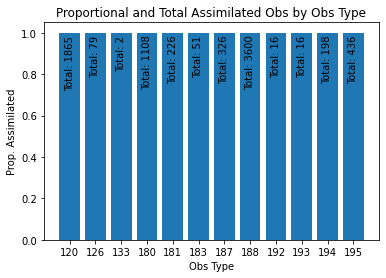

Observation Histogram Statistics: 
n: 7921, mean: 277.81317138671875, std: 21.084293365478516, max: 302.54998779296875, min: 191.64999389648438

OMF Guess Histogram Statistics: 
n: 7921, mean: 0.15551479160785675, std: 1.149137258529663, max: 26.114774703979492, min: -19.386234283447266

OMF Analysis Histogram Statistics: 
n: 7923, mean: 0.045804399996995926, std: 0.8821445107460022, max: 26.139446258544922, min: -19.323843002319336



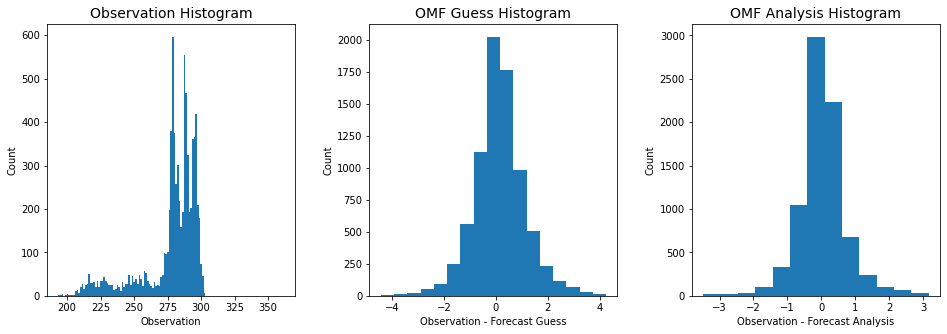

/scratch1/NCEPDEV/da/python/opt/core/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/scratch1/NCEPDEV/da/python/opt/core/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/scratch1/NCEPDEV/da/python/opt/core/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


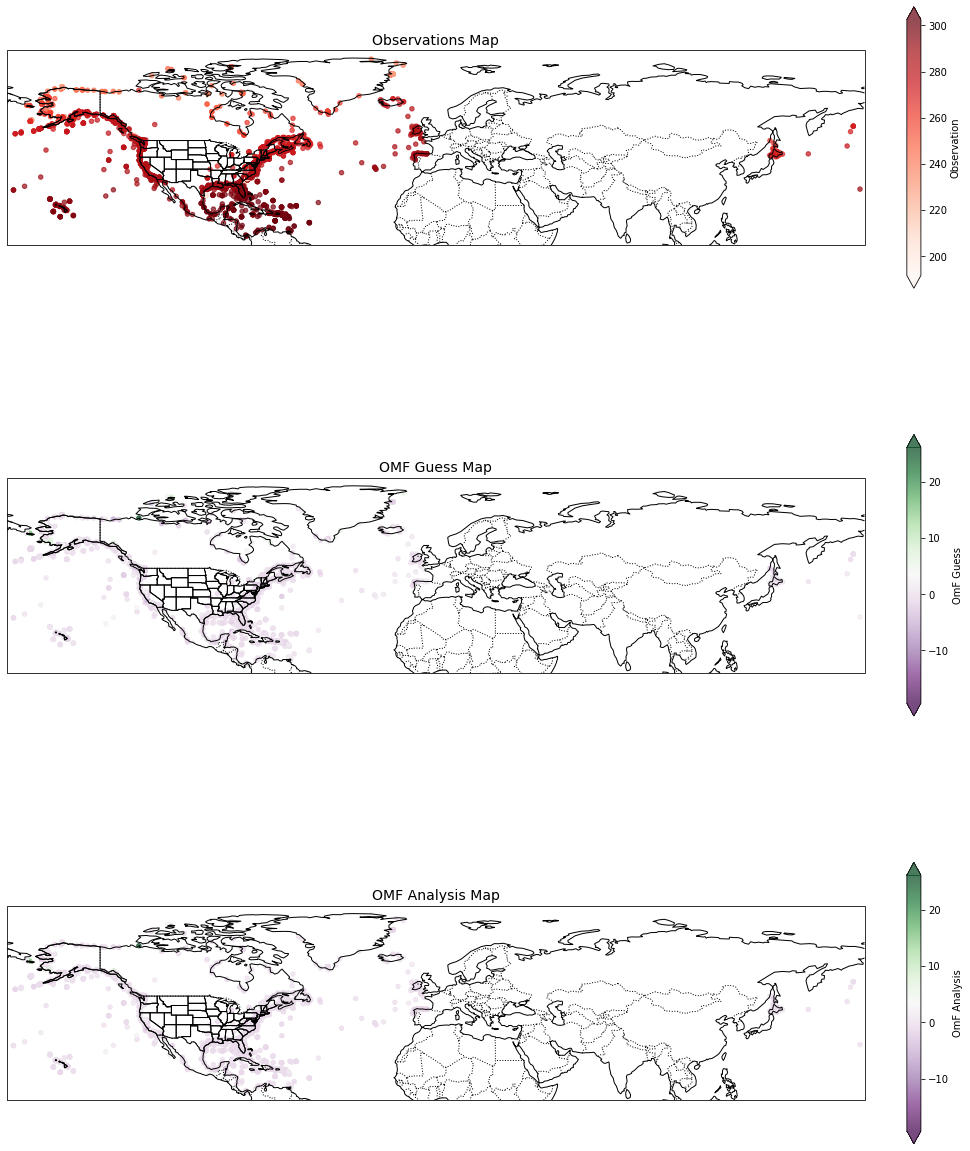

In [11]:
base_plots(df_anl_fil, df_ges_fil)